In [2]:
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
import pandas as pd
plt.rcParams.update({
    "text.usetex": True,
    "font.size": 12,
    "figure.dpi": 150})

In [3]:
def straight_line(x,theta):
    return theta[0]*x + theta[1]

In [4]:
def lnprior(theta,lims):
    lnpr = np.zeros(len(theta))
    for i in range(len(theta)):
        if(lims[i][0] < theta[i] and theta[i] < lims[i][1]):
            lnpr[i] = -1*np.log(1/(lims[i][1]-lims[i][0]))
        else:
            lnpr[i] = -1*np.inf
    return sum(lnpr)

def lnlikelihood(data, theta, model, dev=0):
    if(dev == 0):
        dev = np.ones(len(data[0]))
    return -1/2*np.sum(((data[1] - model(data[0],theta))/dev)**2)


In [5]:
def mcmc(data, model, lims_prior, dispersion_trial, theta_start = [0,0], n_steps=250, max_it=1000, dev=0):
    theta_chain = [theta_start]
    lnposterior_i = lnlikelihood(data, theta_chain[-1:][0], model, dev=dev) + lnprior(theta_chain[-1:][0],lims_prior)
    it = 0
    while (len(theta_chain) < n_steps and it < max_it):
        it += 1
        theta_i = theta_chain[-1:][0]
        theta_trial = np.random.normal(theta_i,dispersion_trial)
        lnposterior_trial = lnlikelihood(data, theta_trial, model, dev=dev) + lnprior(theta_trial,lims_prior)
        p_acc = min(1,np.exp(lnposterior_trial-lnposterior_i))        
        if(p_acc > np.random.uniform()):
            theta_chain.append(theta_trial)
            lnposterior_i = lnposterior_trial
    return np.array(theta_chain).T

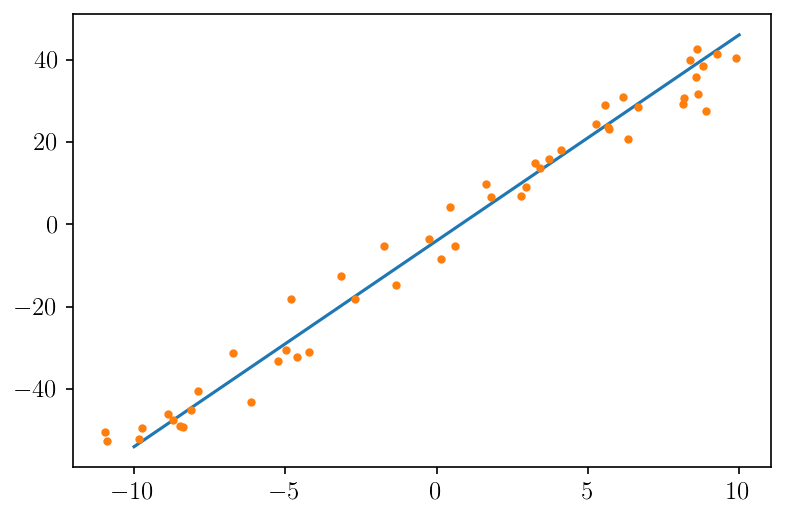

In [6]:
x = np.linspace(-10,10,101)
y = straight_line(x,[5,-4])

x_rands = np.random.uniform(-10,10,50)
data = np.random.normal(np.array([x_rands,straight_line(x_rands,[5,-4])]).T,[1,1]).T

# data = np.random.normal(np.array([x,y]).T,[1,1]).T
plt.plot(x,y);
plt.plot(data[0],data[1],".");

In [7]:
n_chains = 5

chains = []

for i in range(n_chains):
    chain = mcmc(data = data,
                model = straight_line,
                lims_prior = [[0,10],[-10,10]],
                dispersion_trial = [1,1],
                theta_start = np.random.uniform(0,10,2),
                n_steps = 300,
                max_it = 100000)
    chains.append(chain)
chains = np.array(chains)

C:\Users\tu_rk\AppData\Local\Temp\ipykernel_8732\4102198576.py:10: RuntimeWarning: overflow encountered in exp
  p_acc = min(1,np.exp(lnposterior_trial-lnposterior_i))


Text(0, 0.5, '$m$')

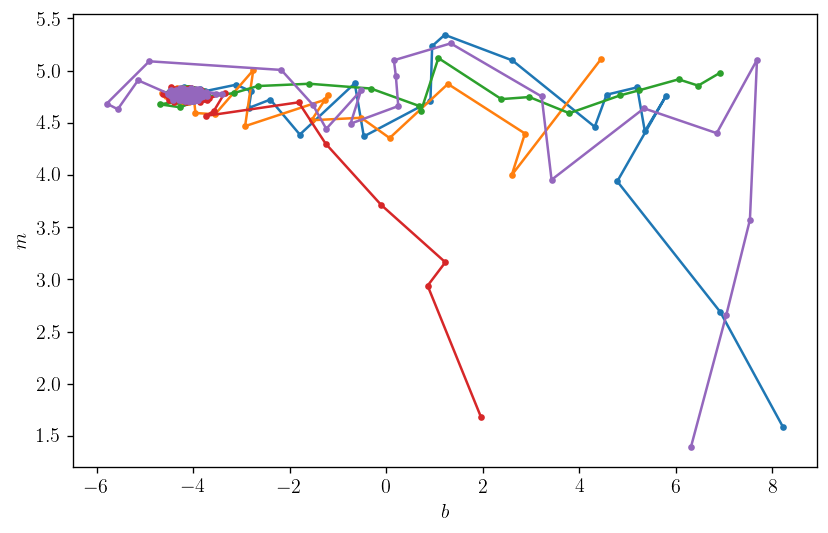

In [8]:
param_names = [r"$m$", r"$b$"]
fig, ax= plt.subplots(figsize=(8,5), dpi=120)
for i in range(len(chains)):
    ax.plot(chains[i][1],chains[i][0],".-")
ax.set_xlabel(param_names[1])
ax.set_ylabel(param_names[0])

Text(0.5, 1.0, 'Cadenas')

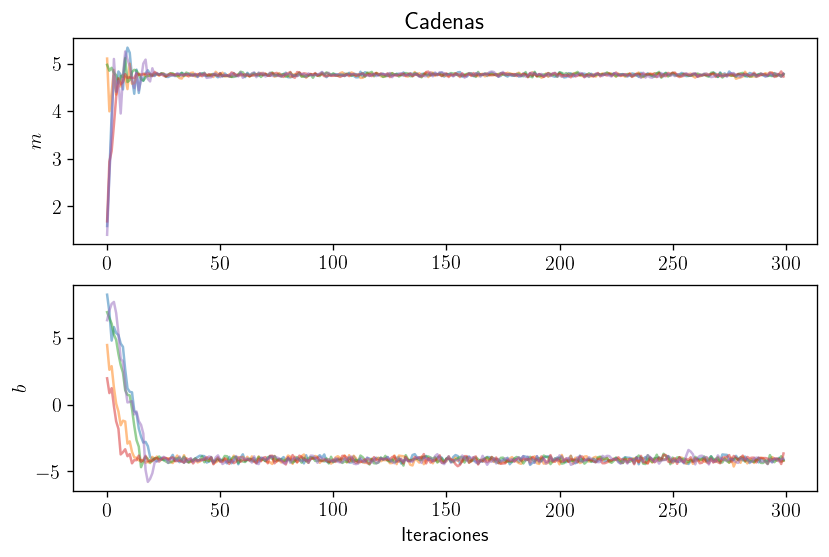

In [9]:
param_names = [r"$m$", r"$b$"]

fig, ax = plt.subplots(chains.shape[1],figsize=(8,5), dpi=120)
for i in range(chains.shape[1]):
    for j in range(chains.shape[0]):
        ax[i].plot(range(len(chains[j][i])),chains[j][i],alpha=0.5)
    ax[i].set_ylabel(param_names[i])

ax[i].set_xlabel('Iteraciones')
ax[0].set_title('Cadenas')

Text(0.5, 1.0, 'Cadenas sin burn')

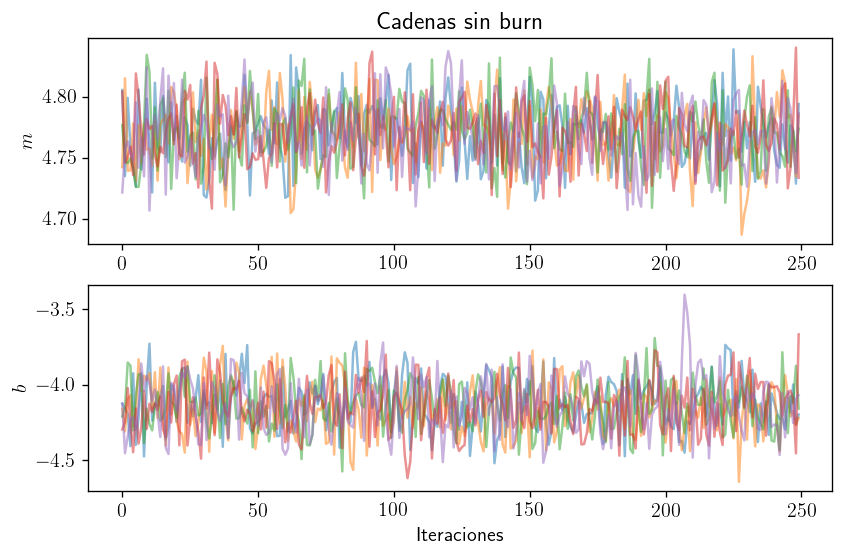

In [10]:
chains_nb = chains.T[50:].T

param_names = [r"$m$", r"$b$"]

fig, ax = plt.subplots(chains.shape[1],figsize=(8,5), dpi=120)
for i in range(chains.shape[1]):
    for j in range(chains.shape[0]):
        ax[i].plot(range(len(chains_nb[j][i])),chains_nb[j][i],alpha=0.5)
    ax[i].set_ylabel(param_names[i])

ax[i].set_xlabel('Iteraciones')
ax[0].set_title('Cadenas sin burn')

In [11]:
chains_concat = np.array([0,0])
for i in range(len(chains_nb)):
    chains_concat = np.vstack([chains_concat,chains_nb[i].T])
chains_concat = np.array(chains_concat[1:])

Removed no burn in


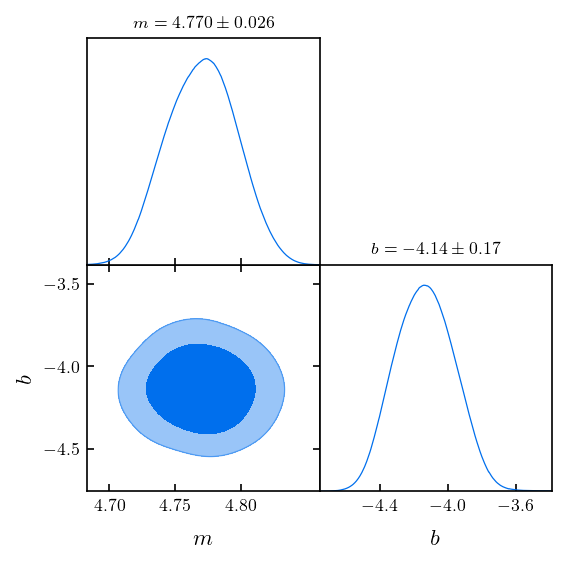

In [12]:
#Gráfica triangular
samples = MCSamples(samples=np.array(chains_concat), names=['m','b'], labels=['m','b'])
plt.rcParams['figure.dpi'] = 150
g = plots.get_subplot_plotter()
g.triangle_plot(samples, filled=True,title_limit=1)
plt.savefig('test.png', dpi = 500)